In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import tqdm
import seaborn as sns
import functools
import operator
import os
import swifter
import collections
train_file = "Train.csv"
test_file = "Test.csv"

In [2]:
df = pd.read_csv(train_file)
tdf = pd.read_csv(test_file)
tdf['Per Person Price'] = np.NaN

df = pd.concat([df, tdf])

In [3]:
df.cov()

,Flight Stops,Meals,Per Person Price
Flight Stops,0.700721,-0.625666,-2.734654e+03
Meals,-0.625666,0.799198,2.772504e+03
Per Person Price,-2734.654081,2772.503536,1.355744e+08


In [4]:
df.corr(method ='pearson')

,Flight Stops,Meals,Per Person Price
Flight Stops,1.000000,-0.836070,-0.281276
Meals,-0.836070,1.000000,0.266456
Per Person Price,-0.281276,0.266456,1.000000


In [5]:
df.corr(method ='spearman')

,Flight Stops,Meals,Per Person Price
Flight Stops,1.000000,-0.883651,-0.316937
Meals,-0.883651,1.000000,0.298216
Per Person Price,-0.316937,0.298216,1.000000


In [6]:
df.isnull().sum()

Uniq Id                          0
Package Name                     0
Package Type                     0
Destination                      0
Itinerary                        0
Places Covered                   0
Travel Date                      0
Hotel Details                    0
Start City                       0
Airline                          0
Flight Stops                     0
Meals                            0
Sightseeing Places Covered       0
Cancellation Rules               0
Per Person Price              9000
dtype: int64

In [7]:
df.shape

(30000, 15)

In [8]:
df.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price'],
      dtype='object')

In [9]:
df['Uniq Id'].nunique() == df.shape[0]

True

<AxesSubplot:xlabel='Package Type', ylabel='count'>

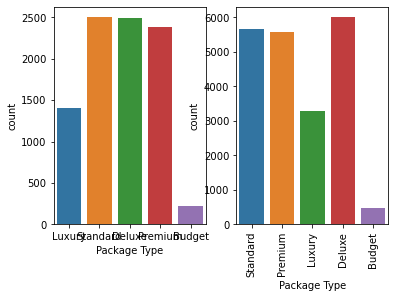

In [10]:

fig, ax = plt.subplots(1,2)

sns.countplot(x='Package Type', data=df[df['Per Person Price'].isna()], ax=ax[0])


plt.xticks(rotation=90)
sns.countplot(x='Package Type', data=df[~df['Per Person Price'].isna()],ax=ax[1])



<AxesSubplot:xlabel='Start City', ylabel='count'>

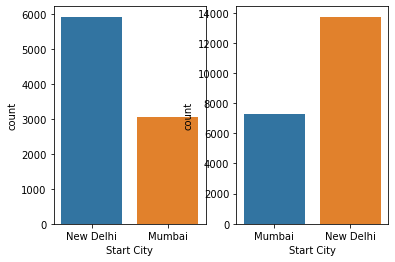

In [11]:
fig, ax = plt.subplots(1,2)
sns.countplot(x=df[df['Per Person Price'].isna()]['Start City'], ax=ax[0])
sns.countplot(x=df[~df['Per Person Price'].isna()]['Start City'], ax=ax[1])

<AxesSubplot:xlabel='Destination', ylabel='count'>

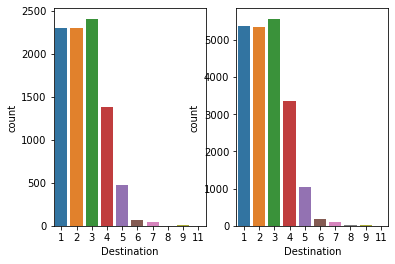

In [12]:
def split_str(x):
    return len(x.split("|"))
fig, ax = plt.subplots(1,2)
sns.countplot(x=df[df['Per Person Price'].isna()]['Destination'].apply(split_str) ,ax=ax[0])

sns.countplot(x=df[~df['Per Person Price'].isna()]['Destination'].apply(split_str), ax=ax[1])


<AxesSubplot:ylabel='count'>

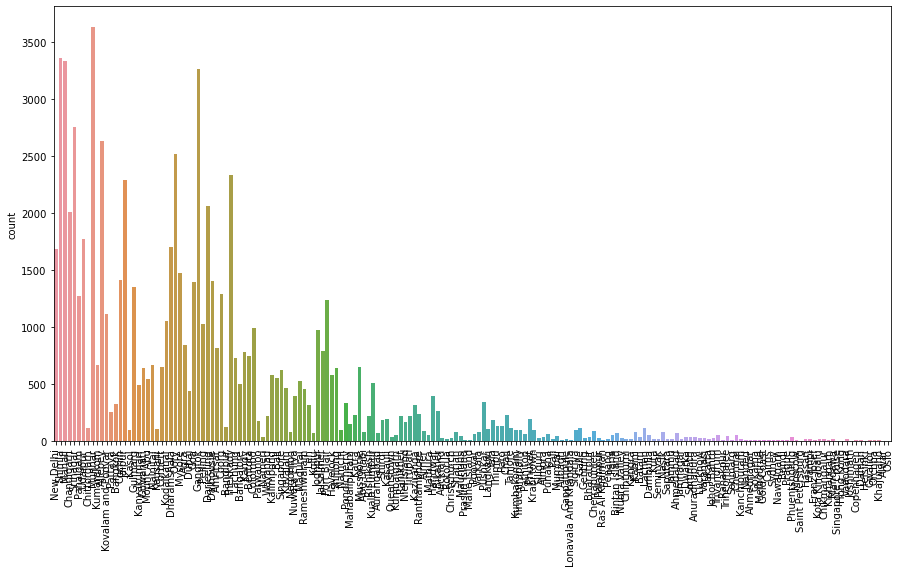

In [13]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
destinations = []
for i in df.Destination:
    destinations.extend(i.split("|"))
sns.countplot(x=pd.Series(destinations))

<AxesSubplot:xlabel='Airline', ylabel='count'>

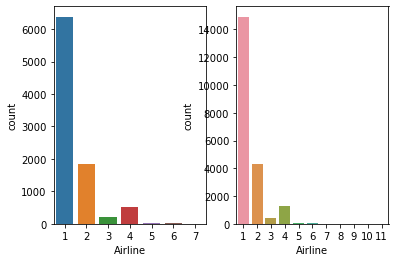

In [14]:
fig, ax = plt.subplots(1,2)
sns.countplot(x=df[df['Per Person Price'].isna()]['Airline'].apply(split_str), ax=ax[0])
sns.countplot(x=df[~df['Per Person Price'].isna()]['Airline'].apply(split_str), ax=ax[1])

<AxesSubplot:ylabel='count'>

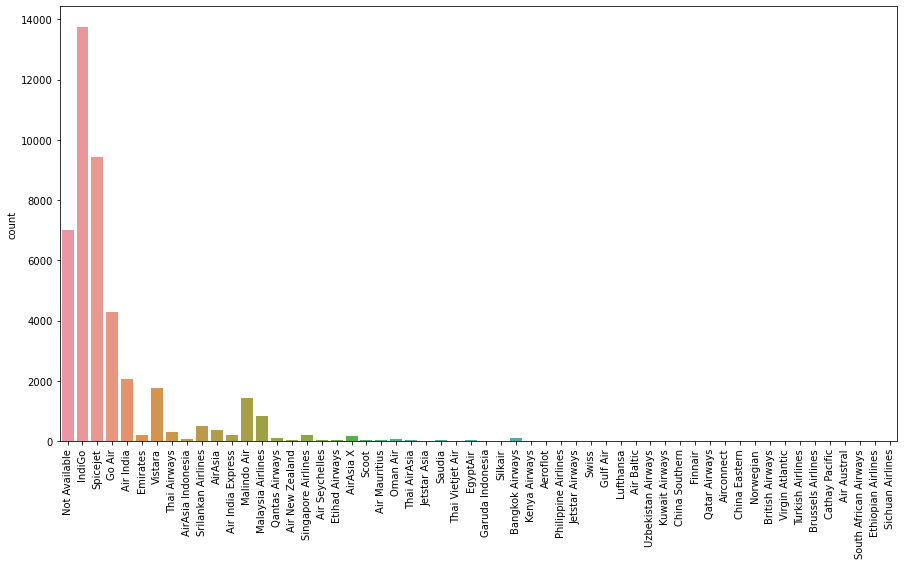

In [15]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
airlines = []
for i in df.Airline:
    airlines.extend(i.split("|"))
sns.countplot(x=pd.Series(airlines))

<AxesSubplot:xlabel='Meals', ylabel='count'>

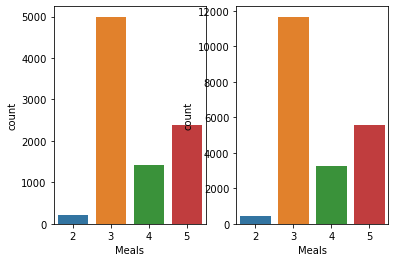

In [16]:
fig, ax = plt.subplots(1,2)
sns.countplot(x="Meals", data=df[df['Per Person Price'].isna()], ax=ax[0])
sns.countplot(x="Meals", data=df[~df['Per Person Price'].isna()], ax=ax[1])

<AxesSubplot:xlabel='Sightseeing Places Covered', ylabel='count'>

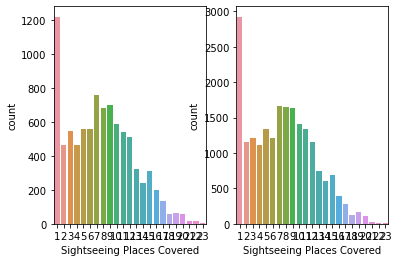

In [17]:
fig, ax = plt.subplots(1,2)
sns.countplot(x=df[df['Per Person Price'].isna()]["Sightseeing Places Covered"].apply(split_str), ax=ax[0])
sns.countplot(x=df[~df['Per Person Price'].isna()]["Sightseeing Places Covered"].apply(split_str), ax=ax[1])

In [18]:
sights = []
for i in df["Sightseeing Places Covered"]:
    sights.extend(i.split("|"))
pd.Series(sights).value_counts(sort=True, ascending=False)    

 Mall road                                                                                     5181
 Eravikulam national park                                                                      3088
 Tata Tea Museum                                                                               2795
 Kufri                                                                                         2769
 Dal Lake                                                                                      2657
                                                                                               ... 
 Transfer from Guwahati to Shillong - Mini Car                                                    1
 Private Transfer - Changi Airport to Any Hotel, Harbour Front or Bus Station in Singapore        1
 Candle Light Dinner at Termalinca (With Transfers)                                               1
 Transfer from Shillong to Guwahati - Mini Car                                                    1


<AxesSubplot:xlabel='Flight Stops', ylabel='count'>

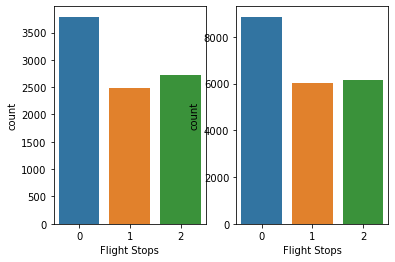

In [19]:
fig, ax = plt.subplots(1,2)
sns.countplot(x=df[df['Per Person Price'].isna()]['Flight Stops'], ax=ax[0])

sns.countplot(x=df[~df['Per Person Price'].isna()]['Flight Stops'], ax=ax[1])

<AxesSubplot:xlabel='Per Person Price', ylabel='Flight Stops'>

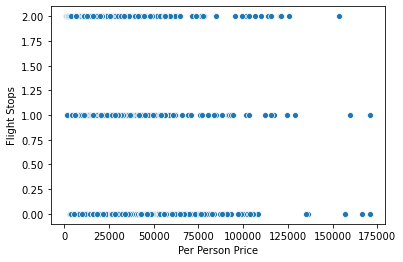

In [20]:
sns.scatterplot(y=df['Flight Stops'], x=df['Per Person Price'])

<AxesSubplot:xlabel='Places Covered', ylabel='count'>

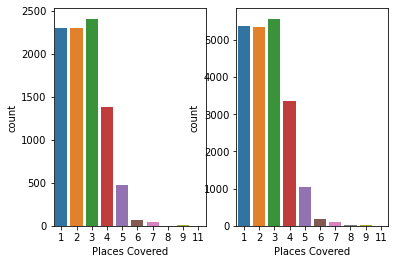

In [21]:
fig, ax = plt.subplots(1,2)
sns.countplot(x=df[df['Per Person Price'].isna()]["Places Covered"].apply(split_str), ax=ax[0])
sns.countplot(x=df[~df['Per Person Price'].isna()]["Places Covered"].apply(split_str), ax=ax[1])

<AxesSubplot:xlabel='Itinerary', ylabel='count'>

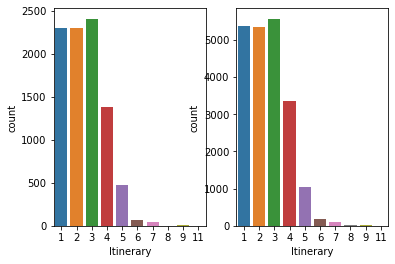

In [22]:
def split_dot(x):
    return len(x.split(' . '))
fig, ax = plt.subplots(1,2)
sns.countplot(x=df[df['Per Person Price'].isna()]['Itinerary'].apply(split_dot), ax=ax[0])

sns.countplot(x=df[~df['Per Person Price'].isna()]['Itinerary'].apply(split_dot), ax=ax[1])

<AxesSubplot:ylabel='count'>

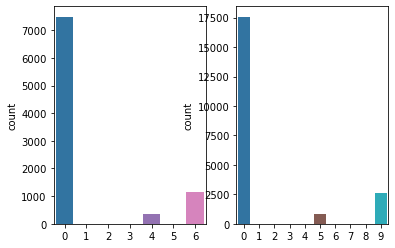

In [23]:

fig, ax = plt.subplots(1,2)
sns.countplot(x=pd.Categorical(df[df['Per Person Price'].isna()]['Cancellation Rules']).codes, ax=ax[0])
sns.countplot(x=pd.Categorical(df[~df['Per Person Price'].isna()]['Cancellation Rules']).codes, ax=ax[1])

In [24]:
pd.Series(pd.Categorical(df['Cancellation Rules']).codes).value_counts(
    sort=True,
    ascending=False
)

0    25063
9     3773
5     1142
4        9
2        5
6        3
1        2
8        1
7        1
3        1
dtype: int64

In [25]:
df['destination_count'] = df['Destination'].apply(split_str)
df['airlines_ccount'] = df['Airline'].apply(split_str)
df['sightseeing_count'] = df["Sightseeing Places Covered"].apply(split_str)
df['hotel_details_count'] = df["Hotel Details"].apply(split_str)
df['place_covered_count'] = df["Places Covered"].apply(split_str)
df['itinerary_count'] = df['Itinerary'].apply(split_dot)


In [26]:
df.to_csv("cleaned_data.csv", index=False)